In [1]:
# install libraries
!pip install scikit-learn
!pip install opencv_python

In [2]:
# import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
!wget https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xvf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [4]:
# Data preprocessing
def preprocess_images(image_dir, size=(64, 64)):
    images = []
    labels = []
    food_labels = os.listdir(image_dir)[0:10]
    for food in food_labels:
        food_path = os.path.join(image_dir, food)
        if os.path.isdir(food_path):
            for img_name in os.listdir(food_path)[:500]:
                img_path = os.path.join(food_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, size)
                img = img.flatten()
                images.append(img)
                labels.append(food)
    return np.array(images), np.array(labels)

In [5]:
# preprocessing images
X, y = preprocess_images("/content/food-101/images")

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 12288)
(1000, 12288)
(4000,)
(1000,)


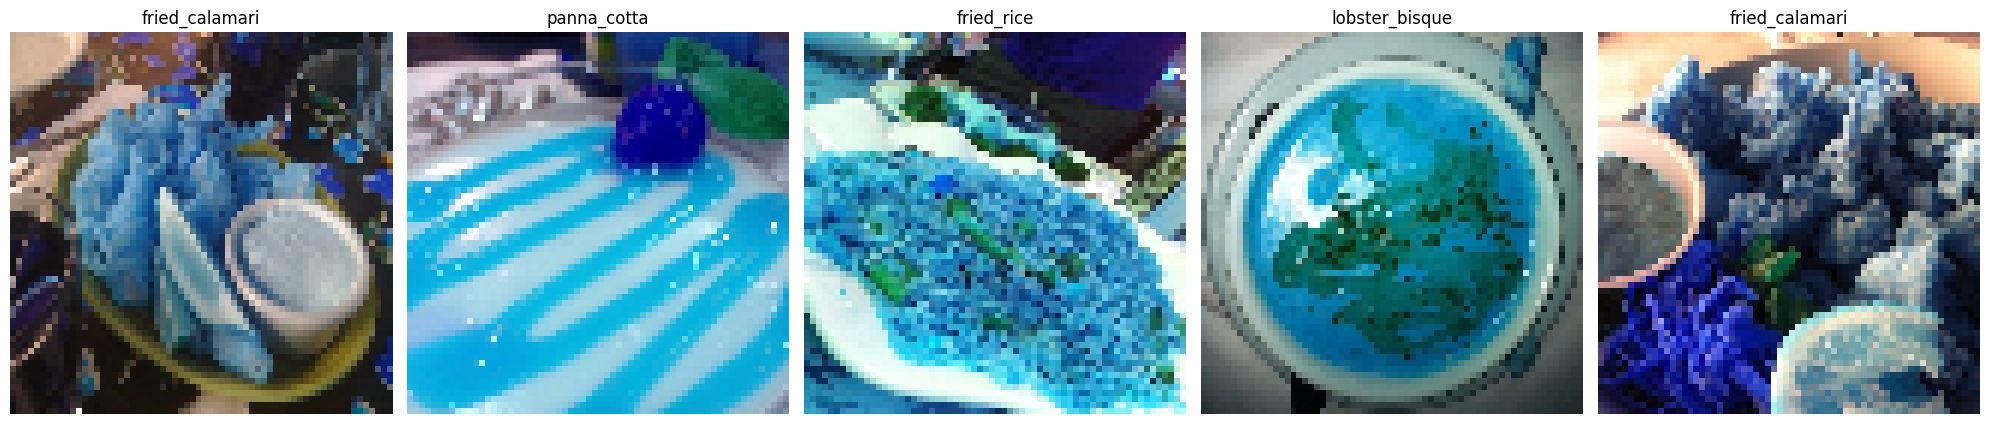

In [9]:
random_indices = random.sample(range(len(X_test)), 5)
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i, idx in enumerate(random_indices):
    image = X_test[idx].reshape(64, 64, 3)
    label = le.inverse_transform([y_test[idx]])[0]
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_class_report = classification_report(y_test, svm_predictions)
print("svm_accuracy: ", svm_accuracy*100)
print("svm_classification_report: ", svm_class_report)

svm_accuracy:  21.6
svm_classification_report:                precision    recall  f1-score   support

           0       0.21      0.26      0.23       105
           1       0.19      0.12      0.15       112
           2       0.20      0.19      0.20        94
           3       0.14      0.21      0.17        81
           4       0.24      0.19      0.21       111
           5       0.19      0.33      0.24        85
           6       0.51      0.34      0.41       105
           7       0.23      0.25      0.24       111
           8       0.20      0.13      0.16        98
           9       0.15      0.14      0.15        98

    accuracy                           0.22      1000
   macro avg       0.23      0.22      0.22      1000
weighted avg       0.23      0.22      0.22      1000



In [13]:
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)
print("Random_Forest_accuracy: ", rf_accuracy*100)
print("Random_Forest_classification_report: ", rf_class_report)

Random_Forest_accuracy:  30.3
Random_Forest_classification_report:                precision    recall  f1-score   support

           0       0.32      0.34      0.33       105
           1       0.17      0.09      0.12       112
           2       0.23      0.29      0.26        94
           3       0.17      0.20      0.18        81
           4       0.26      0.22      0.23       111
           5       0.38      0.54      0.45        85
           6       0.52      0.70      0.60       105
           7       0.41      0.26      0.32       111
           8       0.20      0.18      0.19        98
           9       0.24      0.24      0.24        98

    accuracy                           0.30      1000
   macro avg       0.29      0.31      0.29      1000
weighted avg       0.29      0.30      0.29      1000



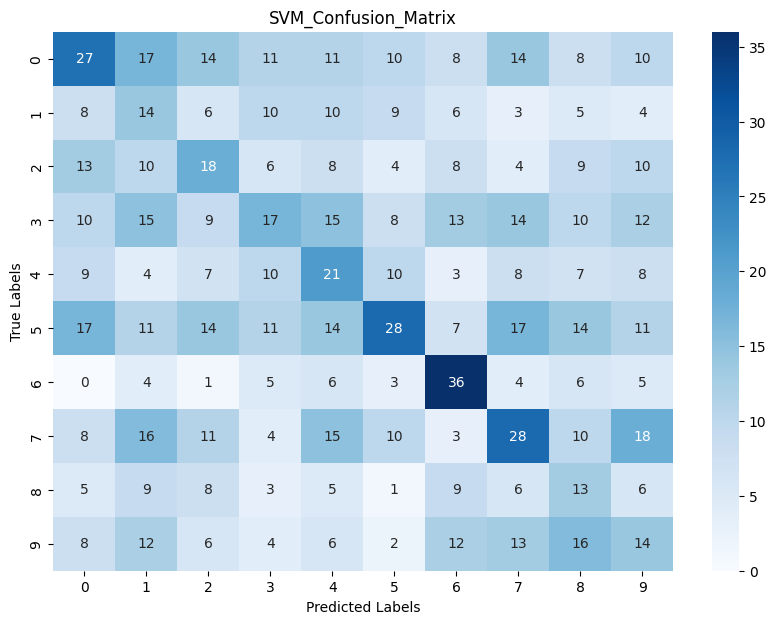

In [14]:
con_mat_svm = confusion_matrix(svm_predictions, y_test)
plt.figure(figsize=(10, 7))
plt.title("SVM_Confusion_Matrix")
sns.heatmap(con_mat_svm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

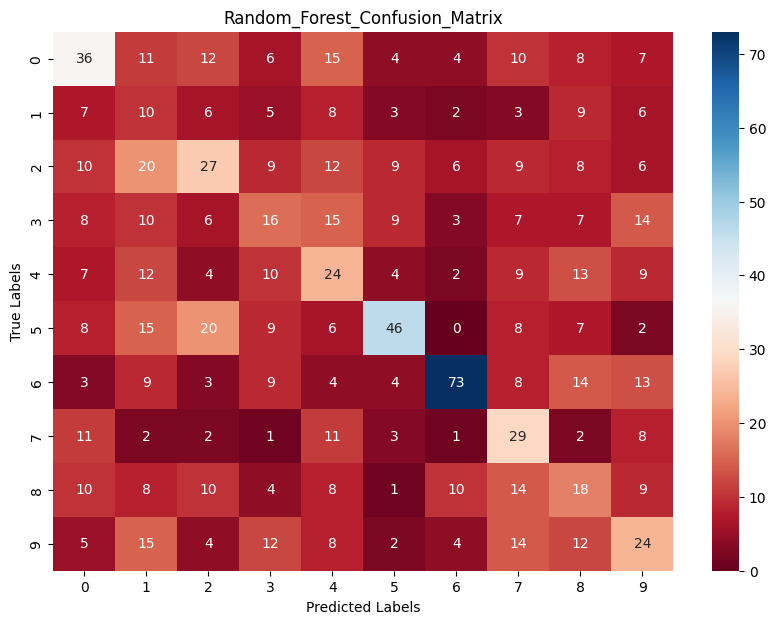

In [15]:
con_mat_rf = confusion_matrix(rf_predictions, y_test)
plt.figure(figsize=(10,7))
plt.title("Random_Forest_Confusion_Matrix")
sns.heatmap(con_mat_rf, annot=True, fmt='d', cmap="RdBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
svm_params = {"C":[0.1, 1, 10], "kernel":["linear", "rbf"]}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3)
svm_grid.fit(X_train, y_train)
print("Best_SVM_Parameters: ", svm_grid.best_params_)

Best_SVM_Parameters:  {'C': 1, 'kernel': 'rbf'}


In [17]:
rf_params = {"n_estimators":[100,200,300], "max_depth":[None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=3)
rf_grid.fit(X_train, y_train)
print("Best_Random_Forest_Parameters: ", rf_grid.best_params_)

Best_Random_Forest_Parameters:  {'max_depth': None, 'n_estimators': 200}


In [18]:
import joblib
joblib.dump(svm, "svm_model.pkl")
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

In [19]:
load_svm_model = joblib.load("svm_model.pkl")
load_rf_model = joblib.load("rf_model.pkl")